## geopandas for GIS-folk, kortversjon

Åpne heller notebook-en her:

https://nbviewer.org/github/statisticsnorway/intro_til_geopandas/blob/main/3_geopandas_for_GIS_folk_kort.ipynb

### Hva er geopandas?

Geopandas er en python-pakke ala arcpy og pyqgis.

GIS-biten er basert på de samme algoritmene som i QGIS, POSTGIS osv.

Det som ikke har med GIS å gjøre er basert på pakken pandas.

## Python

In [44]:
liste_med_kommunenumre = ["0301", "3401", "3401", "0301", "3401", "3401"]
liste_med_kommunenumre

['0301', '3401', '3401', '0301', '3401', '3401']

In [45]:
liste_med_bosatte = [3, 2, 4, 7, 1, 5]
liste_med_bosatte

[3, 2, 4, 7, 1, 5]

In [46]:
dictionary = {
    "KOMMUNENR": liste_med_kommunenumre,
    "bosatte": liste_med_bosatte,
}

dictionary

{'KOMMUNENR': ['0301', '3401', '3401', '0301', '3401', '3401'],
 'bosatte': [3, 2, 4, 7, 1, 5]}

## Pandas

In [89]:
import pandas as pd

In [90]:
adresser = pd.DataFrame(dictionary)
adresser

,KOMMUNENR,bosatte
0,0301,3
1,3401,2
2,3401,4
3,0301,7
4,3401,1
5,3401,5


DataFramen gjør det mulig å endre alle radene i en kolonne på én gang:

In [91]:
adresser["bosatte_x2"] = adresser.bosatte * 2
adresser

,KOMMUNENR,bosatte,bosatte_x2
0,0301,3,6
1,3401,2,4
2,3401,4,8
3,0301,7,14
4,3401,1,2
5,3401,5,10


Og aggregere data:

In [93]:
summert_kommunevis = adresser.groupby("KOMMUNENR").sum()
summert_kommunevis

,bosatte,bosatte_x2
KOMMUNENR,,
0301,10,20
3401,12,24


Og så videre.

## geopandas

In [1]:
import geopandas as gpd
import numpy as np
import sys
sys.path.insert(0, r"C:\Users\ort\git\ssb-sgis\src")
import sgis as sg

I geopandas starter man med å lese inn dataene sine som en GeoDataFrame.

For eksempel kommunedata:

In [2]:
kommuner = gpd.read_file(r"C:\Users\ort\OneDrive - Statistisk sentralbyrå\data\N5000_kommune_flate_p2023_v1.gpkg")
kommuner = kommuner[["KOMMUNENR", "geometry"]]
kommuner

,KOMMUNENR,geometry
0,1826,"MULTIPOLYGON (((481853.009 7304613.470, 481853..."
1,1820,"MULTIPOLYGON (((393031.130 7322897.000, 392431..."
2,5403,"MULTIPOLYGON (((827951.920 7819380.820, 830139..."
3,3428,"MULTIPOLYGON (((284645.390 6883576.450, 285460..."
4,5440,"MULTIPOLYGON (((1038532.450 7912884.141, 10355..."
...,...,...
351,3419,"MULTIPOLYGON (((349950.116 6767424.615, 349950..."
352,1868,"MULTIPOLYGON (((510954.644 7635579.424, 510799..."
353,5057,"MULTIPOLYGON (((253815.590 7094297.689, 256278..."
354,1520,"MULTIPOLYGON (((58031.800 6927998.500, 58905.5..."


In [23]:
kommuner.geometry

0      MULTIPOLYGON (((481853.009 7304613.470, 481853...
1      MULTIPOLYGON (((393031.130 7322897.000, 392431...
2      MULTIPOLYGON (((827951.920 7819380.820, 830139...
3      MULTIPOLYGON (((284645.390 6883576.450, 285460...
4      MULTIPOLYGON (((1038532.450 7912884.141, 10355...
                             ...                        
351    MULTIPOLYGON (((349950.116 6767424.615, 349950...
352    MULTIPOLYGON (((510954.644 7635579.424, 510799...
353    MULTIPOLYGON (((253815.590 7094297.689, 256278...
354    MULTIPOLYGON (((58031.800 6927998.500, 58905.5...
355    MULTIPOLYGON (((283937.130 6733178.620, 286510...
Name: geometry, Length: 356, dtype: geometry

In [25]:
kommuner.buffer(10000)

0      POLYGON ((431887.745 7272316.586, 431814.783 7...
1      POLYGON ((367463.880 7315948.450, 367630.569 7...
2      POLYGON ((765026.591 7790123.288, 766345.035 7...
3      POLYGON ((236668.151 6874353.156, 236252.584 6...
4      POLYGON ((986209.409 7900708.951, 985880.322 7...
                             ...                        
351    POLYGON ((318843.601 6749555.076, 325525.449 6...
352    POLYGON ((484240.679 7637444.231, 484479.894 7...
353    POLYGON ((222744.430 7082113.694, 222742.359 7...
354    POLYGON ((22451.915 6931290.867, 22181.639 693...
355    POLYGON ((256915.080 6737991.261, 256771.094 6...
Length: 356, dtype: geometry

In [29]:
kommuner.dissolve()

,geometry,KOMMUNENR,areal_km2,FYLKE
0,"MULTIPOLYGON (((-28060.000 6510593.000, -28660...",1826,2667.863032,18


In [31]:
kommuner.explode(index_parts=False)

,KOMMUNENR,areal_km2,FYLKE,geometry
0,1826,2667.863032,18,"POLYGON ((481853.009 7304613.470, 481853.031 7..."
1,1820,154.264453,18,"POLYGON ((393031.130 7322897.000, 392431.130 7..."
1,1820,154.264453,18,"POLYGON ((375339.190 7305305.000, 374897.190 7..."
1,1820,154.264453,18,"POLYGON ((382484.320 7302459.210, 381570.160 7..."
1,1820,154.264453,18,"POLYGON ((382681.160 7295064.000, 380681.190 7..."
...,...,...,...,...
352,1868,246.118529,18,"POLYGON ((510954.644 7635579.424, 510799.920 7..."
353,5057,387.589568,50,"POLYGON ((253815.590 7094297.689, 256278.870 7..."
354,1520,648.408180,15,"POLYGON ((58031.800 6927998.500, 58905.520 692..."
354,1520,648.408180,15,"POLYGON ((72334.050 6922742.760, 72343.090 692..."


Man kan enkelt lage kolonner:

In [3]:
kommuner["areal_km2"] = kommuner.area / 1_000_000

kommuner["FYLKE"] = kommuner.KOMMUNENR.str[:2]

kommuner.head()

,KOMMUNENR,geometry,areal_km2,FYLKE
0,1826,"MULTIPOLYGON (((481853.009 7304613.470, 481853...",2667.863032,18
1,1820,"MULTIPOLYGON (((393031.130 7322897.000, 392431...",154.264453,18
2,5403,"MULTIPOLYGON (((827951.920 7819380.820, 830139...",3742.475008,54
3,3428,"MULTIPOLYGON (((284645.390 6883576.450, 285460...",932.515001,34
4,5440,"MULTIPOLYGON (((1038532.450 7912884.141, 10355...",1121.223377,54


In [4]:
sg.explore(kommuner, "areal_km2")

C:\Users\ort\git\ssb-sgis\src\sgis\helpers.py:58: UserWarning: More than one local variable matches the object. Name might be wrong.
  warnings.warn(
c:\Users\ort\AppData\Local\Programs\Python\Python311\Lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(


Og gjøre ulike GIS operasjoner:

c:\Users\ort\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1676: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc)


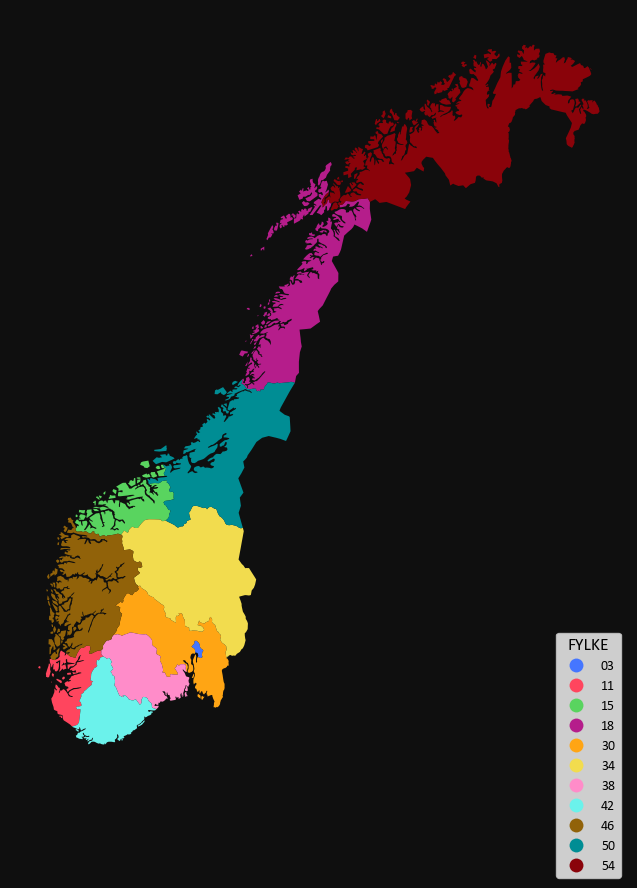

,FYLKE,areal_km2,geometry
0,03,447.533267,"POLYGON ((260144.510 6674128.710, 260144.576 6..."
1,11,9064.737962,"POLYGON ((-31360.030 6512993.000, -31660.040 6..."
2,11,9064.737962,"POLYGON ((-34203.500 6518555.020, -35940.060 6..."
3,11,9064.737962,"POLYGON ((-48327.390 6587146.500, -47610.380 6..."
4,11,9064.737962,"POLYGON ((-37191.200 6593518.600, -37186.790 6..."
...,...,...,...
147,54,73166.673575,"POLYGON ((817348.770 7864403.470, 816884.590 7..."
148,54,73166.673575,"POLYGON ((1096972.860 7888209.210, 1096986.160..."
149,54,73166.673575,"POLYGON ((822030.310 7894795.000, 824430.380 7..."
150,54,73166.673575,"POLYGON ((850008.750 7918298.000, 853511.810 7..."


In [5]:
fylkedelt = (kommuner
             .dissolve(by="FYLKE", aggfunc="sum")
             .reset_index()
             .explode(ignore_index=True)
)

sg.qtm(fylkedelt, "FYLKE")

fylkedelt

Buffer returnerer bare geometrien:

In [6]:
bufret = fylkedelt.buffer(500)
bufret

0      POLYGON ((260153.351 6674628.632, 260201.538 6...
1      POLYGON ((-31360.030 6512493.000, -31407.587 6...
2      POLYGON ((-50405.771 6635869.007, -50374.788 6...
3      POLYGON ((-48265.548 6587643.690, -47580.448 6...
4      POLYGON ((-37618.880 6593777.617, -37591.321 6...
                             ...                        
147    POLYGON ((816974.753 7864071.640, 816944.095 7...
148    POLYGON ((1097034.439 7888705.403, 1097047.718...
149    POLYGON ((821776.172 7894364.403, 821735.254 7...
150    POLYGON ((849555.968 7918510.104, 849578.572 7...
151    POLYGON ((899870.777 7920287.821, 899893.104 7...
Length: 152, dtype: geometry

For å få beholde de andre kolonnene:

In [7]:
bufret = sg.buff(fylkedelt, 500)
bufret

,FYLKE,areal_km2,geometry
0,03,447.533267,"POLYGON ((260153.351 6674628.632, 260168.801 6..."
1,11,9064.737962,"POLYGON ((-31360.030 6512493.000, -31375.904 6..."
2,11,9064.737962,"POLYGON ((-50405.771 6635869.007, -50374.788 6..."
3,11,9064.737962,"POLYGON ((-48265.548 6587643.690, -47580.448 6..."
4,11,9064.737962,"POLYGON ((-37618.880 6593777.617, -37610.431 6..."
...,...,...,...
147,54,73166.673575,"POLYGON ((816974.753 7864071.640, 816964.669 7..."
148,54,73166.673575,"POLYGON ((1097034.439 7888705.403, 1097047.718..."
149,54,73166.673575,"POLYGON ((821776.172 7894364.403, 821762.735 7..."
150,54,73166.673575,"POLYGON ((849555.968 7918510.104, 849562.893 7..."


## Spatial join

La oss si vi har punktdata på skoler i Norge uten info om kommunenummer:

In [8]:
skoler = gpd.read_file(r"C:\Users\ort\OneDrive - Statistisk sentralbyrå\data\Befolkning_0000_Norge_25833_Grunnskoler_FGDB.gdb", layer="Grunnskole")
skoler = skoler[["skolenavn", "geometry"]]
skoler

,skolenavn,geometry
0,Åvangen skole,POINT (256171.360 6599036.769)
1,Åttekanten skole,POINT (263756.436 6558904.439)
2,Åsveien skole og ressurssenter,POINT (268922.856 7040202.726)
3,Åsvang skole,POINT (273040.864 7039485.710)
4,Åstveit skole,POINT (-31753.622 6741425.007)
...,...,...
3053,Adventkirken skole Nidelven,POINT (270077.108 7041280.774)
3054,Abildsø skole,POINT (266419.488 6645565.213)
3055,Abel skole,POINT (159445.114 6537184.596)
3056,Aalesund International School,POINT (49771.214 6956612.648)


Da kan vi gjøre en romlig kobling med kommunene med geopandas.sjoin.

In [9]:
joinet = skoler.sjoin(kommuner).drop("index_right", axis=1)

joinet

,skolenavn,geometry,KOMMUNENR,areal_km2,FYLKE
0,Åvangen skole,POINT (256171.360 6599036.769),3002,136.403376,30
110,Øreåsen skole,POINT (255500.614 6594710.477),3002,136.403376,30
259,Verket skole,POINT (255055.876 6597523.429),3002,136.403376,30
320,Vang skole og ressurssenter,POINT (255238.951 6590615.635),3002,136.403376,30
469,Torderød skole Adventistkirkens grunnskole,POINT (252740.023 6596580.357),3002,136.403376,30
...,...,...,...,...,...
2944,Beiarn barne- og ungdomsskole,POINT (489869.973 7422047.160),1839,1177.837795,18
3013,Aremark skole,POINT (311439.099 6569442.203),3012,323.810775,30
3031,Alvdal ungdomsskole,POINT (272430.894 6893323.396),3428,932.515001,34
3032,Alvdal barneskole,POINT (272763.931 6893355.707),3428,932.515001,34


In [10]:
joinet["antall_skoler_i_kommunen"] = joinet.groupby("KOMMUNENR")["skolenavn"].transform("count")

joinet.sort_values("antall_skoler_i_kommunen")

,skolenavn,geometry,KOMMUNENR,areal_km2,FYLKE,antall_skoler_i_kommunen
3055,Abel skole,POINT (159445.114 6537184.596),4211,311.536603,42,1
2448,Folldal skole,POINT (238679.927 6899079.652),3429,1292.631697,34,1
215,Vik skole,POINT (368045.029 7246292.534),1812,165.604795,18,1
352,Utsira skole,POINT (-74394.012 6617883.616),1151,17.370327,11,1
2366,Gimle skule,POINT (105405.839 6581297.772),3823,1282.425837,38,1
...,...,...,...,...,...,...
845,Slemdal skole,POINT (259504.005 6653786.915),0301,447.533267,03,153
852,Skøyenåsen skole,POINT (267155.744 6647096.565),0301,447.533267,03,153
853,Skøyen skole,POINT (259230.374 6651352.211),0301,447.533267,03,153
715,Steinerskolen på Nordstrand,POINT (264315.745 6643527.826),0301,447.533267,03,153


## Spatial join nearest
sjoin_nearest kan brukes for å finne avstand til nærmeste skole, og samtidig få kolonneinfoen, i dette tilfellet navnet på nærmeste skole:

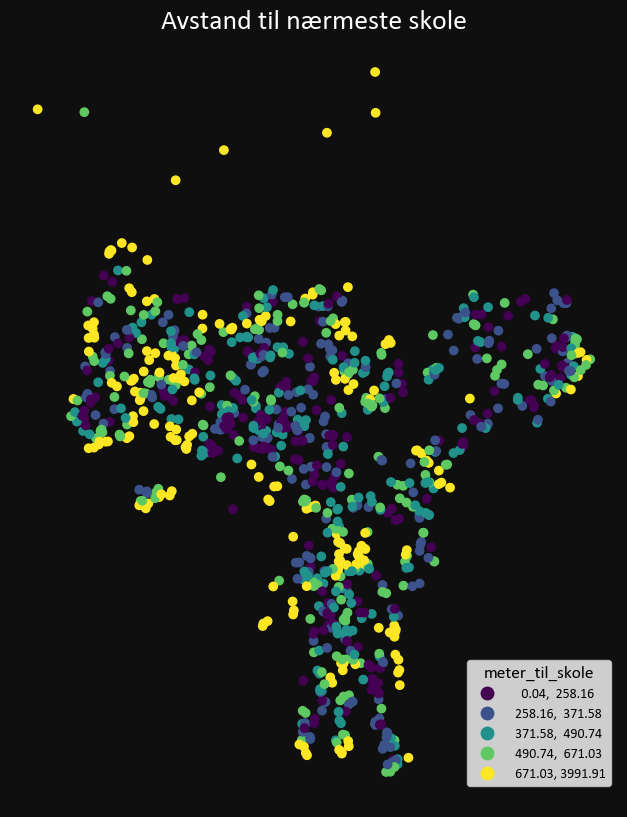

,idx,geometry,index_right,skolenavn,meter_til_skole
886,887,POINT (261129.900 6650608.400),2666,Den Tysk-Norske skolen i Oslo,178.851541
461,462,POINT (256283.900 6652614.400),1580,Lysejordet skole,188.941225
670,671,POINT (270591.900 6652825.600),2325,Gran skole,578.429042


In [11]:
punkter_oslo = sg.read_parquet_url(
    "https://media.githubusercontent.com/media/statisticsnorway/ssb-sgis/main/tests/testdata/points_oslo.parquet"
)

joinet = punkter_oslo.sjoin_nearest(
    skoler,
    distance_col = "meter_til_skole"
)

sg.qtm(joinet, "meter_til_skole", scheme="quantiles", title="Avstand til nærmeste skole")

joinet.sample(3)

Hvis man vil lage en kategorisk kolonne med ja/nei hvis mindre/mer enn 500 meter til nærmeste skole:

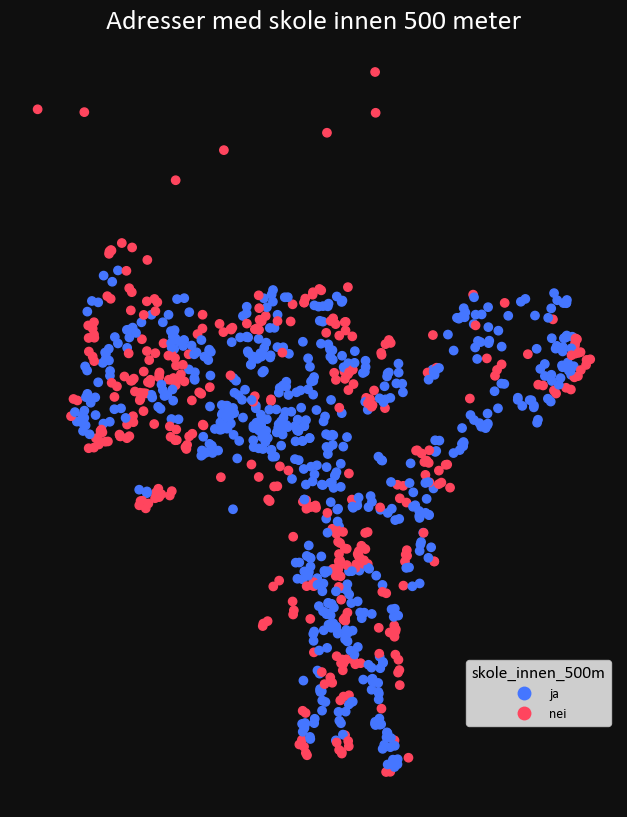

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Adresser med skole innen 500 meter'}>)

In [12]:
joinet["skole_innen_500m"] = np.where(
    joinet["meter_til_skole"] < 500, 
    "ja",
    "nei"
)

sg.qtm(joinet, "skole_innen_500m", title="Adresser med skole innen 500 meter")

## k-nearest neighbors
Finn avstand til k antall naboer, i dette tilfellet avstanden fra ett punkt til alle skoler i Norge:

In [13]:
meter_til_alle_skoler = sg.get_k_nearest_neighbors(
    punkter_oslo.iloc[[0]],
    skoler.set_index("skolenavn"),
    k=None, # antall
    max_dist=None,
    id_cols = ("idx", "skolenavn"),
)
meter_til_alle_skoler

TypeError: get_k_nearest_neighbors() got an unexpected keyword argument 'max_dist'

Forenkling av geopandas-kode.

In [ ]:
# buffer
kopi = kommuner.copy()
kopi["geometry"] = kopi.buffer(100, resolution=50)
kopi["geometry"] = kopi["geometry"].make_valid()

# dissolve
dissolvet = kopi.dissolve(by=["KOMMUNENR", "FYLKE"])
dissolvet["geometry"] = dissolvet["geometry"].make_valid()
kolonnenavn_gjenerobret = dissolvet.reset_index()

#explode
singlepart = kolonnenavn_gjenerobret.explode(ignore_index=True)

In [ ]:
singlepart2 = sg.buffdissexp(kommuner, 100, by=["KOMMUNENR", "FYLKE"])